In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [1]:
import pandas as pd

splits = {'train': 'train.csv', 'validation': 'val.csv', 'test': 'test.csv'}
df = pd.read_csv("hf://datasets/wbxlala/Epilepsy_seizure_prediction_int/" + splits["train"])

c:\Users\jaron\anaconda3\envs\harvardlearn-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df.head()

,sample,label
0,"[-32, -42, -39, -29, -25, -22, -32, -39, -54, ...",1
1,"[-17, -36, -52, -66, -62, -45, -25, -4, 7, 7, ...",1
2,"[44, 37, 14, 7, 2, 4, 9, -8, -13, -11, -14, -3...",1
3,"[-621, -598, -513, -418, -377, -368, -369, -35...",0
4,"[38, 86, 110, 84, 33, -3, -14, 11, 41, 65, 59,...",1


In [7]:
from datasets import load_dataset

# Load the full dataset (train, validation, test splits)
dataset = load_dataset("wbxlala/Epilepsy_seizure_prediction_int")

# Check the splits available
print(dataset)

# Check the feature names and data structure for the training set
print(dataset["train"].features)

# View first example
print(dataset["train"][0])


DatasetDict({
    train: Dataset({
        features: ['sample', 'label'],
        num_rows: 7360
    })
    validation: Dataset({
        features: ['sample', 'label'],
        num_rows: 1840
    })
    test: Dataset({
        features: ['sample', 'label'],
        num_rows: 2300
    })
})
{'sample': Value(dtype='string', id=None), 'label': Value(dtype='int64', id=None)}
{'sample': '[-32, -42, -39, -29, -25, -22, -32, -39, -54, -64, -60, -59, -57, -55, -50, -42, -38, -31, -28, -23, -13, -8, -17, -22, -20, -24, -22, -19, -20, -28, -31, -35, -31, -31, -22, -14, -6, 6, 8, 3, -1, -4, -4, -16, -17, -23, -28, -28, -27, -26, -31, -43, -53, -58, -59, -43, -37, -24, -18, -7, -1, 8, 15, 15, 18, 24, 19, 16, 17, 12, 4, -7, -3, 3, -6, -16, -25, -31, -35, -36, -38, -30, -18, -4, -9, -12, -17, -16, -27, -21, -26, -21, -15, 2, 21, 40, 59, 68, 66, 60, 50, 46, 33, 31, 19, 10, -5, -11, -7, -7, -3, -16, -27, -36, -46, -53, -65, -61, -53, -50, -44, -34, -28, -20, -20, -15, -15, -19, -18, -26, -16, -5, 7, 2

In [9]:
import pandas as pd
import ast  # to safely evaluate stringified lists

# Convert Hugging Face dataset split to pandas
train_df = pd.DataFrame(dataset["train"])

# Convert 'sample' strings to actual Python lists
train_df["sample"] = train_df["sample"].apply(ast.literal_eval)

# Convert each list into separate columns (flatten the signal into features)
features_df = pd.DataFrame(train_df["sample"].tolist())
features_df["label"] = train_df["label"]

print(features_df.head())


     0    1    2    3    4    5    6    7    8    9  ...  169  170  171  172  \
0  -32  -42  -39  -29  -25  -22  -32  -39  -54  -64  ...  105   98   93   88   
1  -17  -36  -52  -66  -62  -45  -25   -4    7    7  ... -101  -96  -89  -82   
2   44   37   14    7    2    4    9   -8  -13  -11  ...   -9  -57  -89  -98   
3 -621 -598 -513 -418 -377 -368 -369 -352 -343 -304  ... -470 -369 -311 -295   
4   38   86  110   84   33   -3  -14   11   41   65  ...    9   19   20   13   

   173  174  175  176  177  label  
0   88   82   69   63   53      1  
1  -62  -33  -19   -1   -8      1  
2  -85  -87  -70  -52  -21      1  
3 -253 -224 -201 -173 -145      0  
4   -2  -21  -31  -29   -5      1  

[5 rows x 179 columns]


In [10]:
# We'll reuse the function from earlier to convert splits
def convert_split(split):
    df = pd.DataFrame(dataset[split])
    df["sample"] = df["sample"].apply(ast.literal_eval)
    features = pd.DataFrame(df["sample"].tolist())
    features["label"] = df["label"]
    return features

# Convert train/test sets
train_df = convert_split("train")
test_df = convert_split("test")

# Split features and labels
X_train = train_df.drop("label", axis=1)
y_train = train_df["label"]
X_test = test_df.drop("label", axis=1)
y_test = test_df["label"]


In [11]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [12]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.938695652173913
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85       465
           1       0.96      0.97      0.96      1835

    accuracy                           0.94      2300
   macro avg       0.91      0.90      0.90      2300
weighted avg       0.94      0.94      0.94      2300



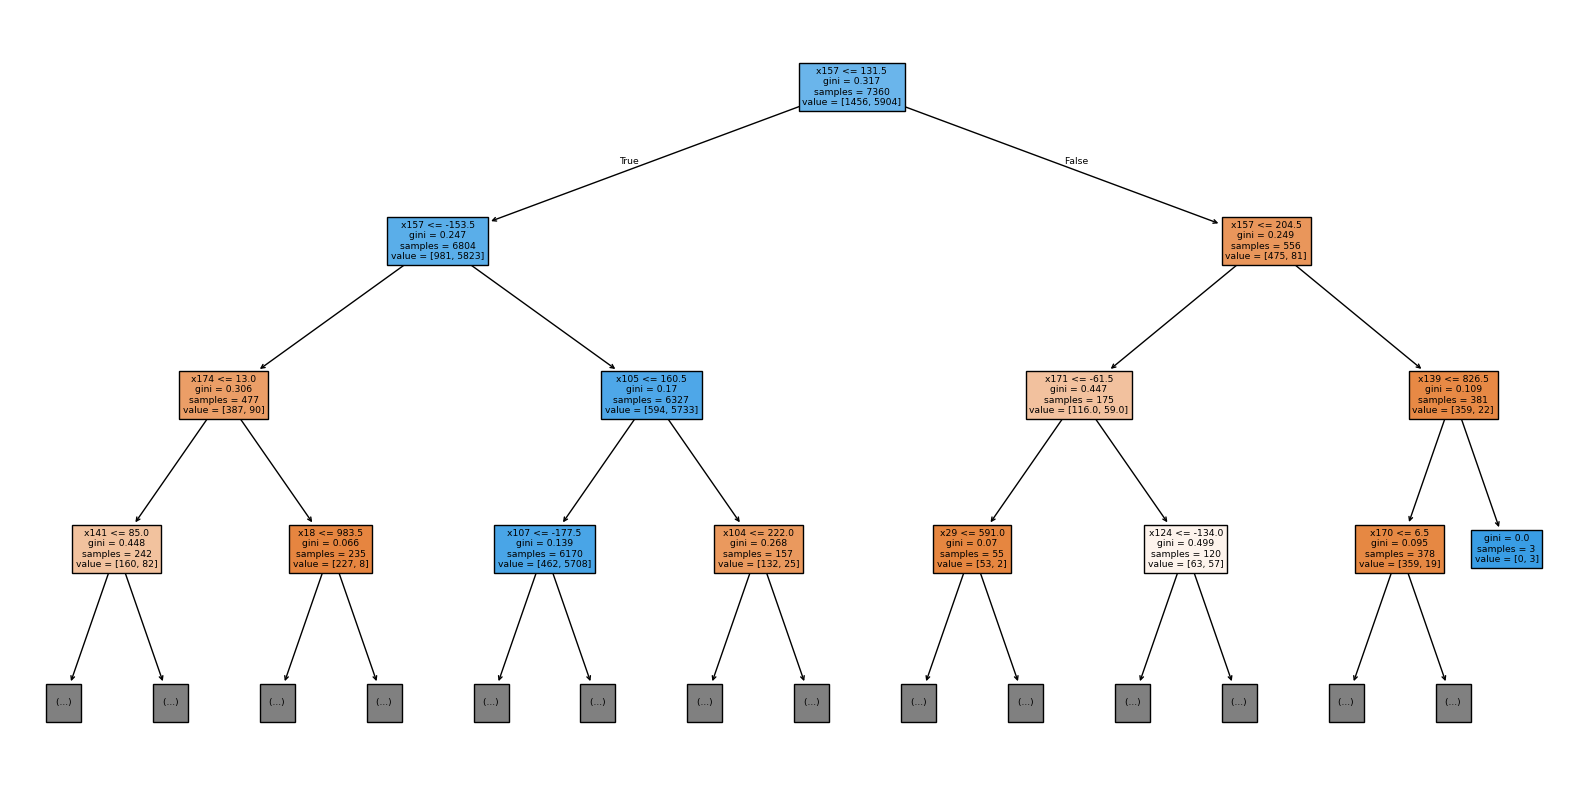

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, max_depth=3, feature_names=[f"x{i}" for i in range(X_train.shape[1])])
plt.show()
